## 6장. 다양한 데이터 타입 다루기

#### 6장 학습 목표
- 스파크의 구조적 연산에서 가장 중요한 표현식 만드는 방법
- 다양한 데이터 타입 다루는 방

#### Spark API 참고
- Spark는 계속 업데이트 되기 때문에 업데이트된 데이터 변환용 함수 찾을 수 있어야함
- DataFrame(Dataset) 메서드 : DataFrame도 Row 타입을 가진 Dataset이므로 Dataset 메서드를 사용하게됨
  - DataFrameStatFunctions : 통계적 함수 제공 
      - http://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/DataFrameNaFunctions.html
  - DataFrameNaFunctions : null 데이터 관련 함수 제공 
      - http://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/DataFrameStatFunctions.html
- Column 메서드 : alias나 contains 같이 컬럼과 관련된 여러가지 메서드 제공
  - http://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/Column.html

#### 6.1 API는 어디서 찾을까

In [30]:
df = spark.read.format('csv').option("header", "true").option("inferSchema", "true").load("/user/fp10225/2010-12-01.csv")

In [2]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [3]:
## sparkdataframe을 sql을 적용할 수 있는 객체로 만듬
df.createOrReplaceTempView("dfTable")

In [4]:
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



#### 6.2 스파크 데이터 타입으로 변환하기

- 특정 프로그래밍 언어의 고유 데이터 타입을 Spark 데이터 타입으로 변환
- 데이터 타입 변환은 'lit'함수 사용

In [3]:
from pyspark.sql.functions import lit

In [4]:
# python 데이터 타입을 스파크 데이터 타입을 변환
df.select(lit(5), lit("five"), lit(5.0), lit("5"))
# SQL
# SELECT 5, "five", 5.0

DataFrame[5: int, five: string, 5.0: double, 5: string]

#### 6.3 Boolean 타입 다루기

- Boolean 구문 : and, or, true, false로 구성
- Boolean 논리 문법 : 데이터 로우 필터링할 때 true/false 판별     

In [3]:
from pyspark.sql.functions import col

df.where(col("InvoiceNo") != 536365).select("InvoiceNo", "Description").show(5, False)

+---------+-----------------------------+
|InvoiceNo|Description                  |
+---------+-----------------------------+
|536366   |HAND WARMER UNION JACK       |
|536366   |HAND WARMER RED POLKA DOT    |
|536367   |ASSORTED COLOUR BIRD ORNAMENT|
|536367   |POPPY'S PLAYHOUSE BEDROOM    |
|536367   |POPPY'S PLAYHOUSE KITCHEN    |
+---------+-----------------------------+
only showing top 5 rows



In [8]:
df.where("InvoiceNo != 536365").select("InvoiceNo", "Description").show(5, False)

+---------+-----------------------------+
|InvoiceNo|Description                  |
+---------+-----------------------------+
|536366   |HAND WARMER UNION JACK       |
|536366   |HAND WARMER RED POLKA DOT    |
|536367   |ASSORTED COLOUR BIRD ORNAMENT|
|536367   |POPPY'S PLAYHOUSE BEDROOM    |
|536367   |POPPY'S PLAYHOUSE KITCHEN    |
+---------+-----------------------------+
only showing top 5 rows



In [31]:
df.where("InvoiceNo = 536365").show(5, False)

+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |2010-12-01 08:26:00|2.55     |17850.0   |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |2010-12-01 08:26:00|2.75     |17850.0   |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
+---------+-----

In [9]:
## <> : 일치하지 않음
df.where("InvoiceNo <> 536365").show(5, False)

+---------+---------+-----------------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                  |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------+--------+-------------------+---------+----------+--------------+
|536366   |22633    |HAND WARMER UNION JACK       |6       |2010-12-01 08:28:00|1.85     |17850.0   |United Kingdom|
|536366   |22632    |HAND WARMER RED POLKA DOT    |6       |2010-12-01 08:28:00|1.85     |17850.0   |United Kingdom|
|536367   |84879    |ASSORTED COLOUR BIRD ORNAMENT|32      |2010-12-01 08:34:00|1.69     |13047.0   |United Kingdom|
|536367   |22745    |POPPY'S PLAYHOUSE BEDROOM    |6       |2010-12-01 08:34:00|2.1      |13047.0   |United Kingdom|
|536367   |22748    |POPPY'S PLAYHOUSE KITCHEN    |6       |2010-12-01 08:34:00|2.1      |13047.0   |United Kingdom|
+---------+---------+-----------------------------+--------+----

- Boolean 표현식 사용할 경우, 항상 모든 표현식을 and 메서드로 묶어 차례대로 필터 적용해야함
- Spark는 내부적으로 and 구문을 필터 사이에 추가해 모든 필터를 하나의 문장으로 변환하고 그런 다음 동시에 모든 필터를 처리
- or 구문은 반드시 동일한 구문에 조건을 정의해야함

In [11]:
from pyspark.sql.functions import instr
## instr : 내가 원하는 컬럼에 내가 원하는 값이 포함되어 있는지 확인

priceFilter = col("UnitPrice") > 600
descripFilter = instr(df.Description, "POSTAGE") >= 1
df.where(df.StockCode.isin("DOT"))\ # Boolean 표현식을 필터링 조건으로 사용
.where(priceFilter | descripFilter).show() # Boolean 표현식을 필터링 조건으로 사용

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



- Boolean 컬럼을 사용해 DataFrame 필터링

In [13]:
DOTCodeFilter = col("StockCode") == 'DOT'
priceFilter = col("UnitPrice") > 600
descripFilter = instr(df.Description, "POSTAGE") >= 1
df.withColumn("isExpensive", DOTCodeFilter & (priceFilter | descripFilter))\
.where("isExpensive")\ ## DataFrame을 필터링
## .filter("isExpensive") -> filter / where 동일하게 사용 가능
.select("unitPrice", "isExpensive").show(5)

+---------+-----------+
|unitPrice|isExpensive|
+---------+-----------+
|   569.77|       true|
|   607.49|       true|
+---------+-----------+



- Boolean 표현식 만들 때 null 값 데이터 다루기

In [16]:
# eqNullSafe : Sql에서 <=> 연산자와 같음
## 일반적으로는 = 와 같지만 Null과 비교시 비교할 값과 Null을 그대로 비교 가능
df.where(col("Description").eqNullSafe("hello")).show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
+---------+---------+-----------+--------+-----------+---------+----------+-------+



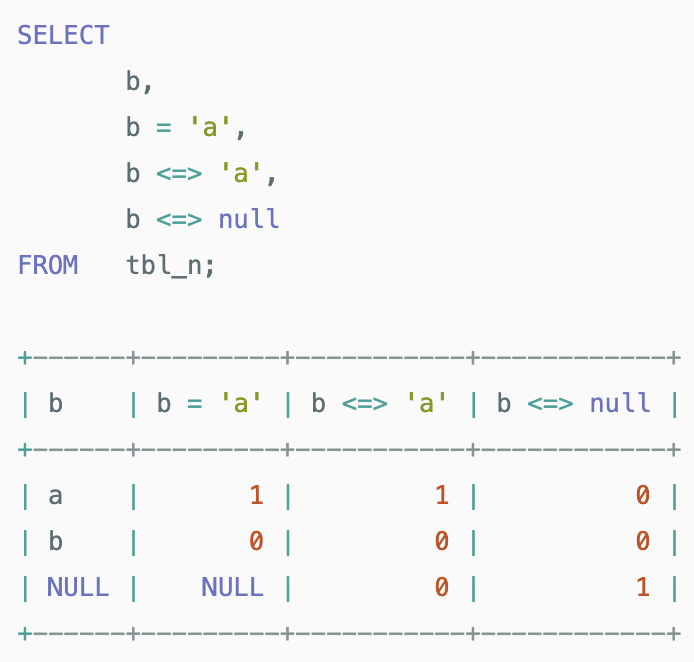

#### 6.4 수치형 데이터 타입 다루기

- 수치형 데이터 타입을 사용해 연산 방식 정의해서 사용 

In [18]:
from pyspark.sql.functions import expr, pow

In [20]:
## Pow : 거듭제곱
fabricatedQuantity = pow(col("Quantity") * col("unitPrice"), 2) + 5
df.select(expr("CustomerId"), fabricatedQuantity.alias("realQuantity")).show(2)

+----------+------------------+
|CustomerId|      realQuantity|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
+----------+------------------+
only showing top 2 rows



In [31]:
## 반올림 : round, 내림 : bround
from pyspark.sql.functions import lit, round, bround

## lit("") -> string도 round, bround 적용 가능
df.select(round(lit("2.5")), bround(lit("2.5")), round(lit(2.5))).show(2)

## Hivesql에서는 type에러 뜨지만, sparksql에서는 적용 가능

+-------------+--------------+-------------+
|round(2.5, 0)|bround(2.5, 0)|round(2.5, 0)|
+-------------+--------------+-------------+
|          3.0|           2.0|          3.0|
|          3.0|           2.0|          3.0|
+-------------+--------------+-------------+
only showing top 2 rows



In [25]:
## pearson 상관계수
from pyspark.sql.functions import corr

## Dataframe의 통계용 함수나 메서드 사용
df.stat.corr("Quantity", "UnitPrice")
df.select(corr("Quantity", "UnitPrice")).show()

+-------------------------+
|corr(Quantity, UnitPrice)|
+-------------------------+
|     -0.04112314436835551|
+-------------------------+



In [27]:
# Stats Schema
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+------------------+------------------+--------------+
|summary|        InvoiceNo|         StockCode|         Description|          Quantity|         UnitPrice|        CustomerID|       Country|
+-------+-----------------+------------------+--------------------+------------------+------------------+------------------+--------------+
|  count|             3108|              3108|                3098|              3108|              3108|              1968|          3108|
|   mean| 536516.684944841|27834.304044117645|                null| 8.627413127413128| 4.151946589446603|15661.388719512195|          null|
| stddev|72.89447869788873|17407.897548583845|                null|26.371821677029203|15.638659854603892|1854.4496996893627|          null|
|    min|           536365|             10002| 4 PURPLE FLOCK D...|               -24|               0.0|           12431.0|     Australia|
|    max|          C

In [30]:
# StatFunctions
from pyspark.sql.functions import count, mean, stddev_pop, min, max

olName = "UnitPrice"
quantileProbs = [0.5]
relError = 0.05 
# The relative target precision to achieve (>= 0). 
# If set to zero, the exact quantiles are computed, which could be very expensive. 

df.stat.approxQuantile("UnitPrice", quantileProbs, relError)

[2.51]

In [6]:
## crosstab : 빈도표
df.stat.crosstab("StockCode", "Quantity").show(5, False)

+------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|StockCode_Quantity|-1 |-10|-12|-2 |-24|-3 |-4 |-5 |-6 |-7 |1  |10 |100|11 |12 |120|128|13 |14 |144|15 |16 |17 |18 |19 |192|2  |20 |200|21 |216|22 |23 |24 |25 |252|27 |28 |288|3  |30 |32 |33 |34 |36 |384|4  |40 |432|47 |48 |480|5  |50 |56 |6  |60 |600|64 |7  |70 |72 |8  |80 |9  |96 |
+------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|22578             |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0  |0

In [37]:
## freqItems : 해당 컬럼에 자주 나오는 값, 쌍으로도 가능 
df.stat.freqItems(['StockCode', "Quantity"]).show()

+--------------------+--------------------+
| StockCode_freqItems|  Quantity_freqItems|
+--------------------+--------------------+
|[90214E, 20728, 2...|[200, 128, 23, 50...|
+--------------------+--------------------+



In [38]:
## monotonically_increasing_id : 모든 row에 고유 ID 값을 추가, 0부터 시작
from pyspark.sql.functions import monotonically_increasing_id

df.select(monotonically_increasing_id()).show(3)

+-----------------------------+
|monotonically_increasing_id()|
+-----------------------------+
|                            0|
|                            1|
|                            2|
+-----------------------------+
only showing top 3 rows



#### 6.5 문자열 데이터 타입 다루기

In [40]:
## initcap : 문장열에서 공백으로 나눠진 모든 단어의 첫글자를 대문자로 변환
from pyspark.sql.functions import initcap

df.select(initcap(col("Description"))).show(2)

+--------------------+
|initcap(Description)|
+--------------------+
|White Hanging Hea...|
| White Metal Lantern|
+--------------------+
only showing top 2 rows



In [45]:
## lower : 문자열 전체를 소문자로 변환
## upper : 문자열 전체를 대문자로 변환
from pyspark.sql.functions import lower, upper

df.select(col("Description"), lower(col("Description")), upper(lower(col("Description")))).show(2)

+--------------------+--------------------+-------------------------+
|         Description|  lower(Description)|upper(lower(Description))|
+--------------------+--------------------+-------------------------+
|WHITE HANGING HEA...|white hanging hea...|     WHITE HANGING HEA...|
| WHITE METAL LANTERN| white metal lantern|      WHITE METAL LANTERN|
+--------------------+--------------------+-------------------------+
only showing top 2 rows



In [39]:
# 공백 다루기 
## rpad, lpad : 특정문자를 원하는 자리수만큼 채워서 반환 -> 오른쪽/왼쪽 기준이 다름
from pyspark.sql.functions import lit, ltrim, rtrim, rpad, lpad, trim

df.select(
ltrim(lit("   HELLO   ")).alias("ltrim"),
rtrim(lit("   HELLO   ")).alias("rtrim"),
trim(lit("   HELLO    ")).alias("trim"),
trim(lit("   HE LLO    ")).alias("trim"), ## 양쪽 끝의 공백만 제거
lpad(lit("HELLO"), 3, " ").alias("lp"),
rpad(lit("HELLO"), 6, "a").alias("rp") 
).show(2)

+--------+--------+-----+------+---+------+
|   ltrim|   rtrim| trim|  trim| lp|    rp|
+--------+--------+-----+------+---+------+
|HELLO   |   HELLO|HELLO|HE LLO|HEL|HELLOa|
|HELLO   |   HELLO|HELLO|HE LLO|HEL|HELLOa|
+--------+--------+-----+------+---+------+
only showing top 2 rows



#### 6.5.1 정규 표현식

- 정규 표현식 : 문자열의 존재 여부 확인, 일치하는 모든 문자열 치환

In [53]:
from pyspark.sql.functions import regexp_replace
## regexp_replace
regex_string = "BLACK|WHITE|RED|GREEN|BLUE"
df.select(regexp_replace(col("Description"), regex_string, "COLOR")\
          .alias("color_clean"), col("Description")).show(2)
                                                                                                                  

+--------------------+--------------------+
|         color_clean|         Description|
+--------------------+--------------------+
|COLOR HANGING HEA...|WHITE HANGING HEA...|
| COLOR METAL LANTERN| WHITE METAL LANTERN|
+--------------------+--------------------+
only showing top 2 rows



In [46]:
## translate : 문자 치환
from pyspark.sql.functions import translate, col
## 여기서 왜 E는 2번?
df.select(translate(col("Description"), "LEET", "1347"), col("Description")).show(5, False)

+-----------------------------------+-----------------------------------+
|translate(Description, LEET, 1347) |Description                        |
+-----------------------------------+-----------------------------------+
|WHI73 HANGING H3AR7 7-1IGH7 HO1D3R |WHITE HANGING HEART T-LIGHT HOLDER |
|WHI73 M37A1 1AN73RN                |WHITE METAL LANTERN                |
|CR3AM CUPID H3AR7S COA7 HANG3R     |CREAM CUPID HEARTS COAT HANGER     |
|KNI773D UNION F1AG HO7 WA73R BO7713|KNITTED UNION FLAG HOT WATER BOTTLE|
|R3D WOO11Y HO77I3 WHI73 H3AR7.     |RED WOOLLY HOTTIE WHITE HEART.     |
+-----------------------------------+-----------------------------------+
only showing top 5 rows



In [70]:
## regexp_extract : 존재하는 문자열 뽑아내기
## 존재하는 문자열 없으면 Null
from pyspark.sql.functions import regexp_extract
extract_str = "(BLACK|WHITE|RED|GREEN|BLUE|CREAM)(.)(CUPID)" ## 괄호 필요함
## 1은 무엇? 괄호 안의 인자값 순서
df.select(regexp_extract(col("Description"), extract_str, 3).alias("color_clean"), col("Description")).show(10, False)

+-----------+-----------------------------------+
|color_clean|Description                        |
+-----------+-----------------------------------+
|           |WHITE HANGING HEART T-LIGHT HOLDER |
|           |WHITE METAL LANTERN                |
|CUPID      |CREAM CUPID HEARTS COAT HANGER     |
|           |KNITTED UNION FLAG HOT WATER BOTTLE|
|           |RED WOOLLY HOTTIE WHITE HEART.     |
|           |SET 7 BABUSHKA NESTING BOXES       |
|           |GLASS STAR FROSTED T-LIGHT HOLDER  |
|           |HAND WARMER UNION JACK             |
|           |HAND WARMER RED POLKA DOT          |
|           |ASSORTED COLOUR BIRD ORNAMENT      |
+-----------+-----------------------------------+
only showing top 10 rows



In [64]:
## contains : 해당 문자가 존재하는 지 확인 후 참/거짓 반환
## pyspark의 경우, contains 메서드가 따로 있진 않고(scala에 있음), instr 메서드 이용 
from pyspark.sql.functions import instr
containsBlack = instr(col("Description"), "BLACK") >= 1
containsWhite = instr(col("Description"), "WHITE") >= 1
df.withColumn("hasSimpleColor", containsBlack | containsWhite)\
.where("hasSimpleColor")\
.select("Description").show(3, False)

+----------------------------------+
|Description                       |
+----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER|
|WHITE METAL LANTERN               |
|RED WOOLLY HOTTIE WHITE HEART.    |
+----------------------------------+
only showing top 3 rows



In [74]:
## 인수의 개수가 동적으로 변하는 경우 - locate 함수 활용
## locate : 문자열의 위치를 정수로 반환하는 함수 
from pyspark.sql.functions import expr, locate 

simpleColors = ["black", "white", "red", "green", "blue"]
def color_locator(column, color_string):
    return locate(color_string.upper(), column).cast("boolean").alias("is_" + color_string)

selectedColumns = [color_locator(df.Description, c) for c in simpleColors]
selectedColumns.append(expr("*")) # Column 타입이어야함

# 동적으로 where 절에 조건을 추가하는 방식
df.select(*selectedColumns).show(10) # * pointer
# .where(expr("is_white OR is_red"))\
# .select("Description").show(10, False)

+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|is_black|is_white|is_red|is_green|is_blue|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   false|    true| false|   false|  false|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   false|    true| false|   false|  false|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   false|   false| false|   false|  false|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   false|   false| false|   false|  false|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12

In [77]:
print(selectedColumns) ## list 형식

[Column<CAST(locate(BLACK, Description, 1) AS BOOLEAN) AS `is_black`>, Column<CAST(locate(WHITE, Description, 1) AS BOOLEAN) AS `is_white`>, Column<CAST(locate(RED, Description, 1) AS BOOLEAN) AS `is_red`>, Column<CAST(locate(GREEN, Description, 1) AS BOOLEAN) AS `is_green`>, Column<CAST(locate(BLUE, Description, 1) AS BOOLEAN) AS `is_blue`>, Column<unresolvedstar()>]


#### 6.6 날짜와 타임스탬프 데이터 타입 다루기

- spark의 2가지 시간 관련 포맷 : 날짜(date), timestamp
- spark의 inferSchema 옵션 활성화 -> 컬럼의 시간 데이터 타입을 최대한 정확하게 식별하려 시도
- 특정 날짜 포맷을 명시하지 않아도 자체적으로 식별해 데이터 읽을 수 있음
- but, 특이한 포맷의 날짜와 시간 데이터를 다룬다면, 각 단계별로 어떤 데이터 타입과 포맷을 유지하는지 알고 트랜스포메이션 적용해야함
- TimestampType 클래스는 초단위까지만 지원, 밀리/마이크로세컨드는 Long 데이터 타입으로 변환하여 처리해야함

In [3]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [24]:
from pyspark.sql.functions import current_date, current_timestamp

dateDF = spark.range(10)\
    .withColumn("today", current_date())\
    .withColumn("now", current_timestamp())
dateDF.createOrReplaceTempView("dataTable")
dateDF.printSchema()

root
 |-- id: long (nullable = false)
 |-- today: date (nullable = false)
 |-- now: timestamp (nullable = false)



In [27]:
## date_add : 날짜 더하기
## date_sub : 날짜 빼기
from pyspark.sql.functions import date_add, date_sub
dateDF.select(date_sub(col("today"), 5), date_add(col("today"),5)).show(1)

+------------------+------------------+
|date_sub(today, 5)|date_add(today, 5)|
+------------------+------------------+
|        2021-06-24|        2021-07-04|
+------------------+------------------+
only showing top 1 row



In [28]:
## datediff : 날짜 차이 구하기
from pyspark.sql.functions import datediff, months_between, to_date
dateDF.withColumn("week_ago", date_sub(col("today"), 7))\
    .select(datediff(col("week_ago"), col("today"))).show(1)

+-------------------------+
|datediff(week_ago, today)|
+-------------------------+
|                       -7|
+-------------------------+
only showing top 1 row



In [29]:
## months_between : 두 날짜 사이의 개월 수 반환
## to_date : 문자열을 날짜로 변환, 날짜 포맷도 지정 가능
dateDF.select(
    to_date(lit("2016-01-01")).alias("start"),
    to_date(lit("2017-05-22")).alias("end"))\
    .select(months_between(col("start"), col("end"))).show(1)

+--------------------------------+
|months_between(start, end, true)|
+--------------------------------+
|                    -16.67741935|
+--------------------------------+
only showing top 1 row



In [15]:
spark.range(5).withColumn("date", lit("2017-01-01"))\
    .select(to_date(col("date"))).show(1)

+---------------+
|to_date(`date`)|
+---------------+
|     2017-01-01|
+---------------+
only showing top 1 row



In [16]:
## 날짜 파싱할 수 없을 땐 null 값 반환
dateDF.select(to_date(lit("2016-20-12")), to_date(lit("2017-12-11"))).show(1)

+---------------------+---------------------+
|to_date('2016-20-12')|to_date('2017-12-11')|
+---------------------+---------------------+
|                 null|           2017-12-11|
+---------------------+---------------------+
only showing top 1 row



In [24]:
## SimpleDataFormat 표준에 맞춰 날짜 포맷 미리 지정
## to_date : 필요에 따라 날짜 포맷 지정 가능
## to_timestamp : 반드시 날짜 포맷 지정

from pyspark.sql.functions import to_date
dateFormat = "yyyy-dd-MM"
cleanDateDF = spark.range(1).select(\
to_date(lit("2017-12-11"), dateFormat).alias("date"),\
to_date(lit("2017-20-12"), dateFormat).alias("date2"))
cleanDateDF.createOrReplaceTempView("dataTable2")

In [22]:
cleanDateDF.show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



In [25]:
from pyspark.sql.functions import to_timestamp
cleanDateDF.select(to_timestamp(col("date"), dateFormat)).show()

+----------------------------------+
|to_timestamp(`date`, 'yyyy-dd-MM')|
+----------------------------------+
|               2017-11-12 00:00:00|
+----------------------------------+



In [26]:
## SQL, timestamp로 변환
## cast(to_date("2017-01-01", "yyyy-dd-MM") as timestamp) 

In [27]:
cleanDateDF.filter(col("date2") > lit("2017-12-12")).show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



In [28]:
cleanDateDF.filter(col("date2") > "'2017-12-12'").show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



#### 6.7 null 값 다루기

In [31]:
# 6.7.1 coalesce
## coalesce : null이 아닌 첫번 째 값 반환
from pyspark.sql.functions import coalesce

df.select(coalesce(col("Description"), col("CustomerID"))).show()

+---------------------------------+
|coalesce(Description, CustomerID)|
+---------------------------------+
|             WHITE HANGING HEA...|
|              WHITE METAL LANTERN|
|             CREAM CUPID HEART...|
|             KNITTED UNION FLA...|
|             RED WOOLLY HOTTIE...|
|             SET 7 BABUSHKA NE...|
|             GLASS STAR FROSTE...|
|             HAND WARMER UNION...|
|             HAND WARMER RED P...|
|             ASSORTED COLOUR B...|
|             POPPY'S PLAYHOUSE...|
|             POPPY'S PLAYHOUSE...|
|             FELTCRAFT PRINCES...|
|             IVORY KNITTED MUG...|
|             BOX OF 6 ASSORTED...|
|             BOX OF VINTAGE JI...|
|             BOX OF VINTAGE AL...|
|             HOME BUILDING BLO...|
|             LOVE BUILDING BLO...|
|             RECIPE BOX WITH M...|
+---------------------------------+
only showing top 20 rows



In [32]:
## 6.7.2 ifnull, nullif, nvl, nvl2
## SQL
### ifnull(null, "return_value") : 첫 번째 갑이 null이면 두 번째 값 반환
### nullif("value", "value") : 두 값이 같으면 null 반환
### nvl(null, "return_value") : 첫 번째 갑이 null이면 두 번째 값 반환
### nvl2('not_null', "return_value", "else_value") : 첫 번째 값이 null이 아니면 두 번째 값을 반환, 첫번째 값이 null이면 세 번째 인수로 지정된 값 반환

In [34]:
## 6.7.3 drop
df.na.drop()
df.na.drop("any")
df.na.drop("all")
df.na.drop("all", subset=["StockCode", "InvoiceNo"])

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [39]:
## 6.7.4 fill
df.na.fill("All Null values become this string")
df.na.fill("all", subset=["StockCode", "InvoiceNo"])

fill_cols_vals = {"StockCode": 5, "Description": "No Value"}
df.na.fill(fill_cols_vals)

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [40]:
## 6.7.5 replace
df.na.replace([""], ["UNKNOWN"], "Description")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

#### 6.8 정렬하기

In [77]:
## asc_null_first / desc_nulls_first
## asc_nulls_last / desc_nulls_last 
df.orderBy(col("Description").asc_nulls_last()).show(5)
df.sort(col("Description").asc_nulls_last()).show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536522|   72800B| 4 PURPLE FLOCK D...|       2|2010-12-01 12:49:00|     2.55|   15012.0|United Kingdom|
|   536409|    22900| SET 2 TEA TOWELS...|       1|2010-12-01 11:45:00|     2.95|   17908.0|United Kingdom|
|   536412|    22900| SET 2 TEA TOWELS...|       2|2010-12-01 11:49:00|     2.95|   17920.0|United Kingdom|
|   536412|    22900| SET 2 TEA TOWELS...|       2|2010-12-01 11:49:00|     2.95|   17920.0|United Kingdom|
|   536415|    22900| SET 2 TEA TOWELS...|       3|2010-12-01 11:57:00|     2.95|   12838.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows

+--

#### 6.9 복합 데이터 다루기

In [13]:
## 6.9.1 구조체
df.selectExpr("struct(Description, InvoiceNo) as complex", "*").show(5)

+--------------------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|             complex|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+--------------------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|[WHITE HANGING HE...|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|[WHITE METAL LANT...|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|[CREAM CUPID HEAR...|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|[KNITTED UNION FL...|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|[RED WOOLLY HOTTI...|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     

In [11]:
from pyspark.sql.functions import struct

complexDF = df.select(struct("Description", "InvoiceNo").alias("complex"))
complexDF.createOrReplaceTempView("complexDF")

In [12]:
complexDF.select("complex.Description").show(5, False)

+-----------------------------------+
|Description                        |
+-----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |
|WHITE METAL LANTERN                |
|CREAM CUPID HEARTS COAT HANGER     |
|KNITTED UNION FLAG HOT WATER BOTTLE|
|RED WOOLLY HOTTIE WHITE HEART.     |
+-----------------------------------+
only showing top 5 rows



In [13]:
complexDF.select(col("complex").getField("Description")).show(5, False)

+-----------------------------------+
|complex.Description                |
+-----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |
|WHITE METAL LANTERN                |
|CREAM CUPID HEARTS COAT HANGER     |
|KNITTED UNION FLAG HOT WATER BOTTLE|
|RED WOOLLY HOTTIE WHITE HEART.     |
+-----------------------------------+
only showing top 5 rows



In [14]:
## .을 이용하면 구조체 컬럼이 하나로 나오지 않고, 모든 컬럼을 최상위 수준으로 끌어올릴 수 있음
complexDF.select("complex.*").show(5, False)

+-----------------------------------+---------+
|Description                        |InvoiceNo|
+-----------------------------------+---------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |
|WHITE METAL LANTERN                |536365   |
|CREAM CUPID HEARTS COAT HANGER     |536365   |
|KNITTED UNION FLAG HOT WATER BOTTLE|536365   |
|RED WOOLLY HOTTIE WHITE HEART.     |536365   |
+-----------------------------------+---------+
only showing top 5 rows



In [15]:
## 구조체 하나로 볼 경우에는, . 없이 select
complexDF.select("complex").show(5, False)

+---------------------------------------------+
|complex                                      |
+---------------------------------------------+
|[WHITE HANGING HEART T-LIGHT HOLDER, 536365] |
|[WHITE METAL LANTERN, 536365]                |
|[CREAM CUPID HEARTS COAT HANGER, 536365]     |
|[KNITTED UNION FLAG HOT WATER BOTTLE, 536365]|
|[RED WOOLLY HOTTIE WHITE HEART., 536365]     |
+---------------------------------------------+
only showing top 5 rows



In [9]:
## 6.9.2 배열
from pyspark.sql.functions import split
## split
df.select(split(col("Description"), " ")).show(2, False)

+----------------------------------------+
|split(Description,  )                   |
+----------------------------------------+
|[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|
|[WHITE, METAL, LANTERN]                 |
+----------------------------------------+
only showing top 2 rows



In [30]:
df.select(split(col("Description"), " ").alias("array_col")).selectExpr("array_col[1]").show(2)

+------------+
|array_col[1]|
+------------+
|     HANGING|
|       METAL|
+------------+
only showing top 2 rows



In [32]:
## size : 배열의 크기 조회
from pyspark.sql.functions import size

df.select(size(split(col("Description"), " "))).show(2)

+---------------------------+
|size(split(Description,  ))|
+---------------------------+
|                          5|
|                          3|
+---------------------------+
only showing top 2 rows



In [34]:
## array_contains : 배열에 특정 값이 존재하는지 확인
from pyspark.sql.functions import array_contains

df.select(array_contains(split(col("Description"), " "), "WHITE")).show(2)

+--------------------------------------------+
|array_contains(split(Description,  ), WHITE)|
+--------------------------------------------+
|                                        true|
|                                        true|
+--------------------------------------------+
only showing top 2 rows



In [78]:
df.show(10)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

In [8]:
## explode : 배열에 존재하는 모든 값을 로우로 쪼개어 변환
from pyspark.sql.functions import split, explode

df.withColumn("splitted", split(col("Description"), " "))\
.withColumn("exploded", explode(col("splitted")))\
.select("Description", "InvoiceNo", "splitted", "exploded").show(10, False)

+----------------------------------+---------+----------------------------------------+--------+
|Description                       |InvoiceNo|splitted                                |exploded|
+----------------------------------+---------+----------------------------------------+--------+
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|WHITE   |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|HANGING |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|HEART   |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|T-LIGHT |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|HOLDER  |
|WHITE METAL LANTERN               |536365   |[WHITE, METAL, LANTERN]                 |WHITE   |
|WHITE METAL LANTERN               |536365   |[WHITE, METAL, LANTERN]                 |METAL   |
|WHITE METAL LANTERN          

In [80]:
## 6.9.3 Map 
## create_map : 컬럼의 키-값 쌍을 이용해 생성
from pyspark.sql.functions import create_map
df.select(create_map(col("Description"), col("InvoiceNo")).alias("complex_map")).show(10, False)

+-----------------------------------------------+
|complex_map                                    |
+-----------------------------------------------+
|[WHITE HANGING HEART T-LIGHT HOLDER -> 536365] |
|[WHITE METAL LANTERN -> 536365]                |
|[CREAM CUPID HEARTS COAT HANGER -> 536365]     |
|[KNITTED UNION FLAG HOT WATER BOTTLE -> 536365]|
|[RED WOOLLY HOTTIE WHITE HEART. -> 536365]     |
|[SET 7 BABUSHKA NESTING BOXES -> 536365]       |
|[GLASS STAR FROSTED T-LIGHT HOLDER -> 536365]  |
|[HAND WARMER UNION JACK -> 536366]             |
|[HAND WARMER RED POLKA DOT -> 536366]          |
|[ASSORTED COLOUR BIRD ORNAMENT -> 536367]      |
+-----------------------------------------------+
only showing top 10 rows



In [23]:
df.select(create_map(col("Description"), col("InvoiceNo")).alias("complex_map")).selectExpr("complex_map['WHITE METAL LANTERN']").show(20)

+--------------------------------+
|complex_map[WHITE METAL LANTERN]|
+--------------------------------+
|                            null|
|                          536365|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
|                            null|
+--------------------------------+
only showing top 20 rows



In [26]:
# key, value 분해하여 컬럼으로 변환
df.select(create_map(col("Description"), col("InvoiceNo")).alias("complex_map")).selectExpr("explode(complex_map)").show(10, False)

+-----------------------------------+------+
|key                                |value |
+-----------------------------------+------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365|
|WHITE METAL LANTERN                |536365|
|CREAM CUPID HEARTS COAT HANGER     |536365|
|KNITTED UNION FLAG HOT WATER BOTTLE|536365|
|RED WOOLLY HOTTIE WHITE HEART.     |536365|
|SET 7 BABUSHKA NESTING BOXES       |536365|
|GLASS STAR FROSTED T-LIGHT HOLDER  |536365|
|HAND WARMER UNION JACK             |536366|
|HAND WARMER RED POLKA DOT          |536366|
|ASSORTED COLOUR BIRD ORNAMENT      |536367|
+-----------------------------------+------+
only showing top 10 rows



#### 6.10 JSON 다루기

In [31]:
jsonDF = spark.range(1).selectExpr("""
'{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}' as jsonString
""")

In [36]:
jsonDF.show(5, False)

+-------------------------------------------+
|jsonString                                 |
+-------------------------------------------+
|{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}|
+-------------------------------------------+



In [33]:
from pyspark.sql.functions import get_json_object, json_tuple

jsonDF.select(
get_json_object(col("jsonString"), "$.myJSONKey.myJSONValue[1]").alias("column"),
json_tuple(col("jsonString"), "myJSONKey")).show(2, False)

+------+-----------------------+
|column|c0                     |
+------+-----------------------+
|2     |{"myJSONValue":[1,2,3]}|
+------+-----------------------+



In [40]:
from pyspark.sql.functions import to_json

df.selectExpr("(InvoiceNo, Description) as myStruct").select(col("myStruct")).show(10, False)

+---------------------------------------------+
|myStruct                                     |
+---------------------------------------------+
|[536365, WHITE HANGING HEART T-LIGHT HOLDER] |
|[536365, WHITE METAL LANTERN]                |
|[536365, CREAM CUPID HEARTS COAT HANGER]     |
|[536365, KNITTED UNION FLAG HOT WATER BOTTLE]|
|[536365, RED WOOLLY HOTTIE WHITE HEART.]     |
|[536365, SET 7 BABUSHKA NESTING BOXES]       |
|[536365, GLASS STAR FROSTED T-LIGHT HOLDER]  |
|[536366, HAND WARMER UNION JACK]             |
|[536366, HAND WARMER RED POLKA DOT]          |
|[536367, ASSORTED COLOUR BIRD ORNAMENT]      |
+---------------------------------------------+
only showing top 10 rows



In [41]:
# to_json : StructType을 JSON 문자열로 변경
df.selectExpr("(InvoiceNo, Description) as myStruct").select(to_json(col("myStruct"))).show(10, False)

+--------------------------------------------------------------------------+
|structstojson(myStruct)                                                   |
+--------------------------------------------------------------------------+
|{"InvoiceNo":"536365","Description":"WHITE HANGING HEART T-LIGHT HOLDER"} |
|{"InvoiceNo":"536365","Description":"WHITE METAL LANTERN"}                |
|{"InvoiceNo":"536365","Description":"CREAM CUPID HEARTS COAT HANGER"}     |
|{"InvoiceNo":"536365","Description":"KNITTED UNION FLAG HOT WATER BOTTLE"}|
|{"InvoiceNo":"536365","Description":"RED WOOLLY HOTTIE WHITE HEART."}     |
|{"InvoiceNo":"536365","Description":"SET 7 BABUSHKA NESTING BOXES"}       |
|{"InvoiceNo":"536365","Description":"GLASS STAR FROSTED T-LIGHT HOLDER"}  |
|{"InvoiceNo":"536366","Description":"HAND WARMER UNION JACK"}             |
|{"InvoiceNo":"536366","Description":"HAND WARMER RED POLKA DOT"}          |
|{"InvoiceNo":"536367","Description":"ASSORTED COLOUR BIRD ORNAMENT"}      |

In [44]:
from pyspark.sql.functions import from_json
from pyspark.sql.types import *

# from_json : 반드시 스키마 지정해야함, JSON 문자열을 다시 지정한 type의 객체로 변환

parseSchema = StructType((
StructField("InvoiceNo", StringType(), True),
StructField("Description", StringType(), True)))

df.selectExpr("(InvoiceNo, Description) as myStruct")\
.select(to_json(col("myStruct")).alias("newJSON"))\
.select(from_json(col("newJSON"), parseSchema), col("newJSON")).show(2, False)

+--------------------------------------------+-------------------------------------------------------------------------+
|jsontostructs(newJSON)                      |newJSON                                                                  |
+--------------------------------------------+-------------------------------------------------------------------------+
|[536365, WHITE HANGING HEART T-LIGHT HOLDER]|{"InvoiceNo":"536365","Description":"WHITE HANGING HEART T-LIGHT HOLDER"}|
|[536365, WHITE METAL LANTERN]               |{"InvoiceNo":"536365","Description":"WHITE METAL LANTERN"}               |
+--------------------------------------------+-------------------------------------------------------------------------+
only showing top 2 rows



#### 6.11 사용자 정의 함수 (User Defined Function) 

- UDF : 파이썬, 스칼라, 외부 라이브러리를 사용해 사용자가 원하는 형태로 트랜스포메이션을 만들 수 있게함
- 하나 이상의 컬럼을 입력으로 받고, 반환
- 여러 가지 프로그래밍 언어로 개발할 수 있음
- 레코드별로 데이터 처리하는 함수 -> 독특한 포맷이나 도메인에 특화된 언어를 사용하지 않음
- 기본적으로 특정 SparkSession이나 Context에서 사용할 수 있도록 임시 함수 형태로 등록

In [83]:
## 함수 정의
udfExampleDF = spark.range(5).toDF("num")

def power3(double_value):
    return double_value ** 3
power3(2.0)

8.0

- 함수 정의 이후에는 함수를 스파크에 등록 : 워커 노드에서 생성된 함수를 사용할 수 있게 함
- 스파크는 드라이버에서 함수를 직렬화하고 네트워크를 통해 익스큐터 프로세스로 전달
    - 직렬화 : 객체를 복원가능하면서 전송이 가능한 상태로 바꾸는 작업
- 동작 방식 : 언어에 따라 근본적으로 다름
    - Scala, Java 
        - JVM 환경에서만 사용 가능 
        - 스파크 내장 함수가 제공하고 코드 생성 기능 활용 불가 -> 약간의 성능 저하
    - Python 
        - 워커 노드에 python 프로세스 실행하고 python이 이해 가능한 포맷으로 모든 데이터를 직렬화
        - python 프로세스에 있는 데이터의 로우마다 함수 실행 후, 마지막으로 JVM과 스파크에 처리 결과 반환
        
- 주의사항
    - python으로 데이터를 전달하기 위한 데이터 직렬화가 부하가 가장 큼
    - 데이터가 python으로 전달되면 spark에서 워커 메모리를 관리할 수 없음 
    - -> JVM과 python이 동일한 머신에서 메모리 경합하면 자원에 제약이 생겨 워커가 비정상적으로 종료될 가능성 있음
    - 결론 : 스칼라로 함수 개발해라! python에서도 쓸 수 있다!

In [84]:
## 함수 등록
from pyspark.sql.functions import udf

power3udf = udf(power3)

In [48]:
udfExampleDF.show()

+---+
|num|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [47]:
from pyspark.sql.functions import col
## 여기까지는 사용자 정의 함수 DataFrame에서만 쓸 수 있음, 문자열 표현식에서는 불가
udfExampleDF.select(power3udf(col("num"))).show(2)

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
+-----------+
only showing top 2 rows



In [89]:
## 사용자 정의 함수를 Sparksql에 등록 -> 모든 프로그래밍 언어와 SQL에서 사용 가능
## spark는 python의 데이터 타입과는 다른 데이터 타입 사용하기 때문에 함수 정의할 때 반환 타입 지정하는 것이 좋음
## 반환될 실제 데이터 타입과 일치하지 않는 데이터 타입을 지정하면 오류가 아닌 null 값 반환

from pyspark.sql.types import IntegerType, DoubleType, FloatType

spark.udf.register("power3py", power3, DoubleType())

udfExampleDF.selectExpr("power3py(num)").show(2)

+-------------+
|power3py(num)|
+-------------+
|         null|
|         null|
+-------------+
only showing top 2 rows



In [56]:
spark.udf.register("power33py", power3, IntegerType())
udfExampleDF.selectExpr("power33py(num)").show(5)

+--------------+
|power33py(num)|
+--------------+
|             0|
|             1|
|             8|
|            27|
|            64|
+--------------+



#### 6.12 Hive UDF

- Hive 문법을 사용해서 만든 UDF/UDAF도 사용 가능
- SparkSession 생성시 SparkSession.builder().enableHiveSupport() 를 명시해 하이브 지원 기능을 활성화 해야함
- 활성화되면 SQL로 UDF 등록 가능

In [57]:
## SQL
## CREATE TEMPORARY FUNCTION myFunc AS 'com.orgarnization.hive.udf.FunctionName'
## TEMPORARY 없애면 하이브 메타스토어에 영구 함수로 등록됨

#### 6.13 정리
- 스파크 SQL을 사용 목적에 맞게 확장하는게 참 쉬움
- 특화되 언어가 아닌 스파크를 사용하지 않고도 간단한 함수만으로 스파크 SQL 확장 가능